In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [104]:
oecd_bli = pd.read_csv("handson-ml-master/datasets/lifesat/oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   

Indicator  Household net adjusted disposable income  \
Country                                               
Australia                                   31588.0   
Austria                                     31173.0   

Indicator  Household net financial wealth         ...          \
Country                                           ...           
Australia                         47657.0         ...           
Austria                           49887.0         ...           

Indicator  Long-term unemployment rate  Personal earnings  \
Country                                                     
Australia                         1.08            50449.0   
Austria                           1.19            45199.0   

Indicator  Quality of support network  Rooms per person  Self-reported health  \
Country                                                                         
Australia                        92.0               2.3                  85.0   
Austria                          89.0               1.6                  69.0   

Indicator  Student skills  Time devoted to leisure and personal care  \
Country                                                                
Australia           512.0                                      14.41   
Austria             500.0                                      14.46   

Indicator  Voter turnout  Water quality  Years in education  
Country                                                      
Australia           93.0           91.0                19.4  
Austria             75.0           94.0                17.0  

[2 rows x 24 columns]

In [105]:
gdp_per_capita = pd.read_csv("handson-ml-master/datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [106]:
gdp_per_capita.rename(columns={"2015": "GDP"} ,inplace=True)

In [107]:
eco_data = gdp_per_capita[["Country", "GDP"]]

In [108]:
eco_data.set_index("Country", inplace=True)

In [109]:
eco_data.head()

GDP
Country                       
Afghanistan            599.994
Albania               3995.383
Algeria               4318.135
Angola                4100.315
Antigua and Barbuda  14414.302

In [110]:
merged = eco_data.merge(oecd_bli, right_index=True, left_index=True)

In [111]:
merged.sort_values("GDP", inplace=True)

In [112]:
merged.head()

GDP  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                        
Brazil    8669.998           18.0           7.9                          4.0   
Mexico    9009.280           30.0          12.8                          9.0   
Russia    9054.914           15.0           3.8                          2.5   
Turkey    9437.372           35.0           5.0                          5.5   
Hungary  12239.894           15.0           3.6                          7.9   

         Dwellings without basic facilities  Educational attainment  \
Country                                                               
Brazil                                  6.7                    45.0   
Mexico                                  4.2                    37.0   
Russia                                 15.1                    94.0   
Turkey                                 12.7                    34.0   
Hungary                                 4.8                    82.0   

         Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                      
Brazil                               10.41             67.0           25.5   
Mexico                               28.83             61.0           23.4   
Russia                                0.16             69.0           12.8   
Turkey                               40.86             50.0            1.2   
Hungary                               3.19             58.0            1.3   

         Household net adjusted disposable income         ...          \
Country                                                   ...           
Brazil                                    11664.0         ...           
Mexico                                    13085.0         ...           
Russia                                    19292.0         ...           
Turkey                                    14095.0         ...           
Hungary                                   15442.0         ...           

         Long-term unemployment rate  Personal earnings  \
Country                                                   
Brazil                          1.97            17177.0   
Mexico                          0.08            16193.0   
Russia                          1.70            20885.0   
Turkey                          2.37            16919.0   
Hungary                         5.10            20948.0   

         Quality of support network  Rooms per person  Self-reported health  \
Country                                                                       
Brazil                         90.0               1.6                  69.0   
Mexico                         77.0               1.0                  66.0   
Russia                         90.0               0.9                  37.0   
Turkey                         86.0               1.1                  68.0   
Hungary                        87.0               1.1                  57.0   

         Student skills  Time devoted to leisure and personal care  \
Country                                                              
Brazil            402.0                                      14.97   
Mexico            417.0                                      13.89   
Russia            481.0                                      14.97   
Turkey            462.0                                      13.42   
Hungary           487.0                                      15.04   

         Voter turnout  Water quality  Years in education  
Country                                                    
Brazil            79.0           72.0                16.3  
Mexico            63.0           67.0                14.4  
Russia            65.0           56.0                16.0  
Turkey            88.0           62.0                16.4  
Hungary           62.0           77.0                17.6  

[5 rows x 25 colu

In [113]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

In [114]:
final_countries = merged.iloc[keep_indices]

In [115]:
final_countries.head()

GDP  Air pollution  Assault rate  \
Country                                                   
Russia            9054.914           15.0           3.8   
Turkey            9437.372           35.0           5.0   
Hungary          12239.894           15.0           3.6   
Poland           12495.334           33.0           1.4   
Slovak Republic  15991.736           13.0           3.0   

                 Consultation on rule-making  \
Country                                        
Russia                                   2.5   
Turkey                                   5.5   
Hungary                                  7.9   
Poland                                  10.8   
Slovak Republic                          6.6   

                 Dwellings without basic facilities  Educational attainment  \
Country                                                                       
Russia                                         15.1                    94.0   
Turkey                                         12.7                    34.0   
Hungary                                         4.8                    82.0   
Poland                                          3.2                    90.0   
Slovak Republic                                 0.6                    92.0   

                 Employees working very long hours  Employment rate  \
Country                                                               
Russia                                        0.16             69.0   
Turkey                                       40.86             50.0   
Hungary                                       3.19             58.0   
Poland                                        7.41             60.0   
Slovak Republic                               7.02             60.0   

                 Homicide rate  Household net adjusted disposable income  \
Country                                                                    
Russia                    12.8                                   19292.0   
Turkey                     1.2                                   14095.0   
Hungary                    1.3                                   15442.0   
Poland                     0.9                                   17852.0   
Slovak Republic            1.2                                   17503.0   

                        ...          Long-term unemployment rate  \
Country                 ...                                        
Russia                  ...                                 1.70   
Turkey                  ...                                 2.37   
Hungary                 ...                                 5.10   
Poland                  ...                                 3.77   
Slovak Republic         ...                                 9.46   

                 Personal earnings  Quality of support network  \
Country                                                          
Russia                     20885.0                        90.0   
Turkey                     16919.0                        86.0   
Hungary                    20948.0                        87.0   
Poland                     22655.0                        91.0   
Slovak Republic            20307.0                        90.0   

                 Rooms per person  Self-reported health  Student skills  \
Country                                                                   
Russia                        0.9                  37.0           481.0   
Turkey                        1.1                  68.0           462.0   
Hungary                       1.1                  57.0           487.0   
Poland                        1.1                  58.0           521.0   
Slovak Republic               1.1                  66.0           472.0   

                 Time devoted to leisure and personal care  Voter turnout  \
Country                                                                     
Russia                                               14.97         

In [116]:
simple = final_countries[["GDP","Life satisfaction"]]

In [117]:
simple.rename(columns={"Life satisfaction": "LS"}, inplace=True)

C:\Develop\Python\Anaconda\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [118]:
simple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Russia to United States
Data columns (total 2 columns):
GDP    29 non-null float64
LS     29 non-null float64
dtypes: float64(2)
memory usage: 696.0+ bytes


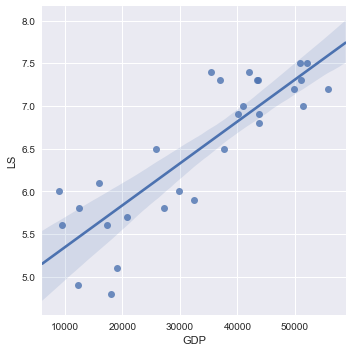

In [119]:
sns.lmplot("GDP", "LS", simple)

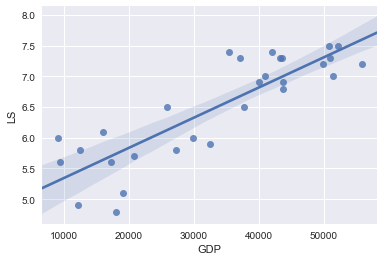

In [120]:
sns.regplot("GDP", "LS", simple)

In [121]:
from sklearn.linear_model import LinearRegression

In [147]:
model = LinearRegression()


In [152]:
X = simple.drop("LS", axis=1)

In [153]:
X.head()

GDP
Country                   
Russia            9054.914
Turkey            9437.372
Hungary          12239.894
Poland           12495.334
Slovak Republic  15991.736

In [154]:
y = simple["LS"]

In [156]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
model.predict([[22587]])

array([ 5.96242338])

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

TypeError: 'builtin_function_or_method' object is not subscriptable